In [1]:
import pandas as pd
import geopandas as gpd
import pickle
from shapely.geometry import Polygon, MultiPolygon
import numpy as np
import seaborn as sns; sns.set(); sns.set_style("white")

%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()

root_path = "D:/GeoData/"
Main_CRS = "EPSG:27700"

In [2]:
#Function for opening saved data
def load_obj(name ):
    with open(root_path + 'WorkingData/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
def MakePolygon(centre, sq_sz, inp_crs):
    mnx = centre[0]-(sq_sz/2)
    mny = centre[1]-(sq_sz/2)
    mxx = centre[0]+(sq_sz/2)
    mxy = centre[1]+(sq_sz/2)
    polygon =Polygon([(mnx, mny), (mnx,mxy), (mxx,mxy), (mxx,mny), (mnx, mny)])
    poly_gdf = gpd.GeoDataFrame(geometry=[polygon], crs=inp_crs)
    return poly_gdf

In [5]:
gdf = load_obj("raw_gdf")

In [4]:
sm_gdf = load_obj("raw_gdf_StPauls")

In [7]:
gdf["Type"].unique().tolist()

['RailwayStations',
 'FerryTerminals',
 'BusStops',
 'RoadAccidents',
 'Postcodes',
 'LReg',
 'FireStations',
 'Schools',
 'Crimes',
 'Clinic',
 'Dentists',
 'GP',
 'Hospital',
 'Opticians',
 'Pharmacy',
 'Care homes and care at home',
 'All_GB',
 'National_Parks',
 'LocalAuthorities',
 'LSOA',
 'GreenSpace',
 'Rivers',
 'Railway_Lines',
 'Woodland_Region',
 'Urban_Region',
 'Foreshor_Region',
 'Ferry_Line',
 'Coastline',
 'Lakes',
 'Road',
 'MotorwayJunction',
 'Peat',
 'SiteOfScientificInterest',
 'LocalNatureReserve',
 'NationalNatureReserve',
 'SpecialAreaOfConservation',
 'AncientWoodland',
 'ConservationArea',
 'Listed Buildings',
 'MetOffice']

In [8]:
fig, ax = plt.subplots(1, figsize=(15,15))
plt.title("London Roads")
sm_gdf.loc[sm_gdf["Type"]=="All_GB",:].plot(ax=ax, color='none', edgecolor='black', zorder=1)
sm_gdf.loc[sm_gdf["Type"]=="RoadAccidents",:].plot(ax=ax, color='blue', marker='*',markersize=50, zorder=2)
sm_gdf.loc[(sm_gdf["Type"]=="Road") & (sm_gdf["Name"]=="Motorway"),:].plot(ax=ax, color='black', linewidth=3, zorder=3)
sm_gdf.loc[(sm_gdf["Type"]=="Road") & (sm_gdf["Name"]=="A Road"),:].plot(ax=ax, color='black', linewidth=2, zorder=4)
sm_gdf.loc[(sm_gdf["Type"]=="Road") & (sm_gdf["Name"]=="B Road"),:].plot(ax=ax, color='black', linewidth=1, zorder=5)
sm_gdf.loc[(sm_gdf["Type"]=="Road") & (~sm_gdf["Name"].isin(["Motorway", "A Road", "B Road"])),:].plot(ax=ax, color='black', linewidth=0.5, zorder=6)
plt.savefig("D:/GeoData/WorkingData/Images/Road_Test.png",dpi=300)
#plt.close(fig)


C:\Users\richa\Anaconda3\envs\GeoData\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


In [29]:
for i in ['TotalRainfall_mm_2020', 'Sunlight_h_2020', 'AverageTemperature_C_2020', 'GroundFrost_Days_2020', 'Snow_Days_2020']:
    fig, ax = plt.subplots(1, figsize=(30,60))
    plt.title(str(i) + "Across the UK", fontsize='xx-large')
    gdf.loc[gdf["Type"]=="All_GB",:].plot(ax=ax, color='none', edgecolor='black', zorder=1)

    points = gdf.loc[(gdf["Type"]=="MetOffice") & (gdf["Name"]==i) & (gdf["Details_Float"].notna()),:].copy()

    cap = points["Details_Float"].quantile(0.95)
    points["Normalised"] = points["Details_Float"] / cap
    points["Normalised"] = points['Normalised'].where(points['Normalised'] <= 1, 1)  

    points.plot(ax=ax, c="blue", markersize=1, alpha=points["Normalised"])

    legend_points = [round(points["Details_Float"].quantile(0.10),0), round(points["Details_Float"].quantile(0.30),0), round(points["Details_Float"].quantile(0.50),0), round(points["Details_Float"].quantile(0.70),0), round(points["Details_Float"].quantile(0.90),0)]

    for val in legend_points:
        plt.scatter([], [], c="blue", alpha=val/cap, label=str(val))
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title=i, loc='center right', fontsize='large' )

    plt.savefig("D:/GeoData/WorkingData/Images/" + i +'.png',dpi=300)
    plt.close(fig)

C:\Users\richa\Anaconda3\envs\GeoData\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


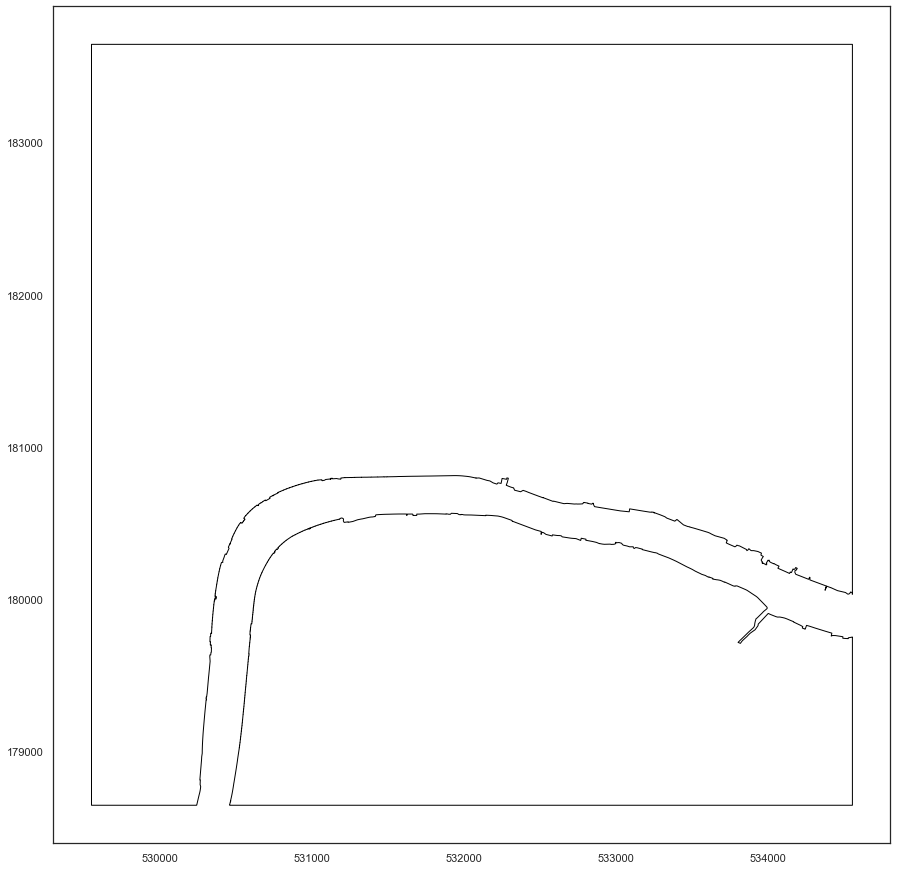

In [9]:
#https://towardsdatascience.com/from-kernel-density-estimation-to-spatial-analysis-in-python-64ddcdb6bc9b

points = sm_gdf.loc[(sm_gdf["Type"]=="Crimes"),:].copy()

fig, ax = plt.subplots(1, figsize=(15,30))
sm_gdf.loc[sm_gdf["Type"]=="All_GB",:].plot(ax=ax, color='none', edgecolor='black', zorder=1)
points.plot(ax=ax)
# Create thresholds
levels = [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]

kde = sns.kdeplot(
    ax=ax,
    x=points['geometry'].x,
    y= points['geometry'].y,
    levels = levels,
    shade=True,
    cmap='Blues',
    alpha=0.5,
    
)

plt.show()


In [17]:
gdf.loc[(gdf["Type"]=="Crimes"),:].plot()

<AxesSubplot:>

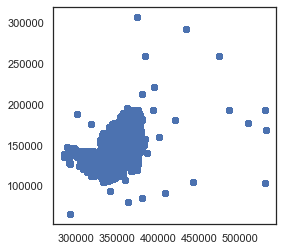

In [18]:
plt.show()